In [1]:
import os


import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,GridSearchCV, cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Train-Test Splitting

In [4]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [5]:
print('df_train: ',df_train.shape[0])
print('df_test: ',df_test.shape[0])

df_train:  404
df_test:  102


In [107]:
df_train['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [108]:
375/29

12.931034482758621

In [109]:
df_test['CHAS'].value_counts()

0    96
1     6
Name: CHAS, dtype: int64

In [110]:
96/6

16.0

As we could see there is imbalance distribute of the 'CHAS' data in the training dataset and testing dataset.
Hence we are using different technique which could help us to do the proper splitting of the all the attributes present in the dataframe.

In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [7]:
for train_index, test_index  in split.split(df, df['CHAS']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [8]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [9]:
376/28

13.428571428571429

In [10]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
95/7

13.571428571428571

As we could see there is no imbalance distribution of the 'CHAS' data in the training dataset and testing dataset.

In [12]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [13]:
housing = strat_train_set.copy()

# Looking for Correlations

In [14]:
housing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

High Positive Correlation:
    MEDV vs (RM, )
    
High Negative Correlation:
    MEDV vs (LSTAT,)

Here, we could analysis all features in terms of histogram plot. We could see value on X-Axis & its observation on Y-Axis

In [15]:
attributes = ['MEDV','RM','ZN','LSTAT']

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

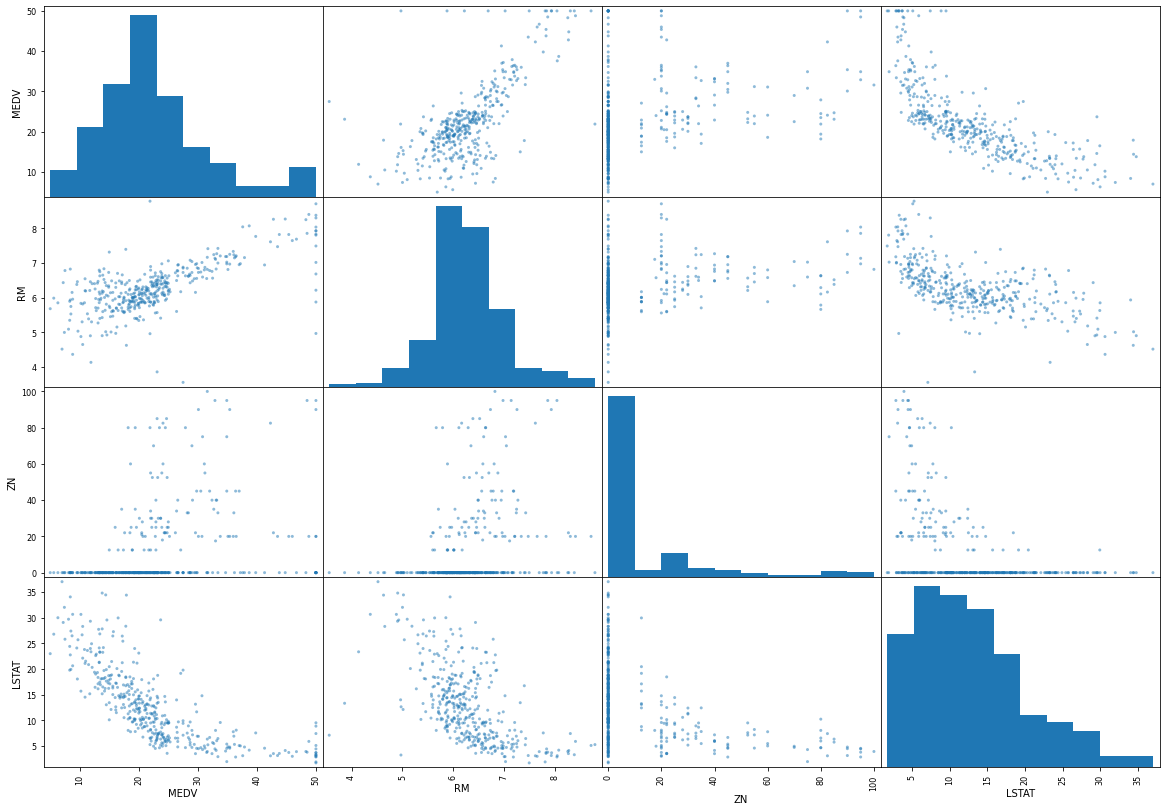

In [16]:
scatter_matrix(housing[attributes],figsize=(20,14))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

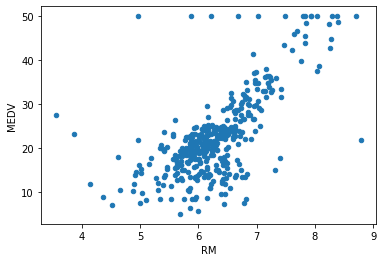

In [17]:
housing.plot(x='RM',y='MEDV',kind='scatter')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

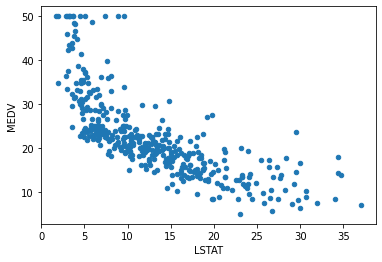

In [18]:
housing.plot(x='LSTAT',y='MEDV',kind='scatter')

## Trying out Attribute Combinations 

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [20]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
housing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

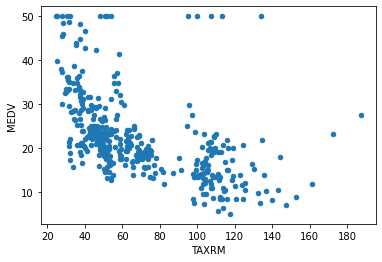

In [23]:
housing.plot(x='TAXRM',y='MEDV',kind='scatter')

In [24]:
housing.describe()  #before we start our Imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


But we are not using this. It's just for correlation purpose.

In [25]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_lable= strat_train_set['MEDV'].copy()

 ## Missing Attributes

To take care of missing attributes, we have three options:
1. Get rid of missing data points
2. Get rid of the whole attribute
3. Set the value to some value(0, mean or medium).

In [26]:
housing.shape

(404, 13)

In [27]:
housing['RM'].median()

6.209

In [28]:
housing['RM'].fillna(housing['RM'].median())

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
imputer = SimpleImputer(strategy='median')

In [32]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
imputer.statistics_.shape

(13,)

In [35]:
X= imputer.transform(housing)

In [36]:
housing_tr= pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [39]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


## Creating Pipeline

**Feature Scaling**
1. Min-Max Scaling(Normalization) >> (value-min)/(max-min) >>MinMaxScaler

2. Standardization Scaling >> (value-mean)/standard deviation >> StandardScaler

In [40]:
pipe= Pipeline([ ('imputer',SimpleImputer(strategy='median')),
                 ('std_scaler', StandardScaler()),
               ])

In [41]:
housing_num_tr = pipe.fit_transform(housing)

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape

(404, 13)

In [44]:
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

## Selecting desired Model for the Real State

## Linear Regression

### Linear Regression Model Training

In [45]:
model_1 = LinearRegression()

In [46]:
model_1.fit(housing_num_tr,housing_lable)

LinearRegression()

In [47]:
some_data_1 = housing.iloc[:5]
some_lables_1 = housing_lable.iloc[:5]

In [48]:
prepared_data_1= pipe.transform(some_data_1)

In [49]:
model_1.predict(prepared_data_1)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [50]:
list(some_lables_1)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Linear Regression- Prediction on Training Data 

In [51]:
linear_housing_prediction= model_1.predict(housing_num_tr)

In [52]:
linear_mse = mean_squared_error(housing_lable,linear_housing_prediction)
linear_rmse= np.sqrt(linear_mse)

In [53]:
linear_rmse

4.835301058716238

### Linear Regressor- Prediction on Training Data using Cross Validation Evaluation Technique

In [54]:
linear_scores_1 = cross_val_score(model_1,
                        housing_num_tr,
                        housing_lable,
                        scoring='neg_mean_squared_error',
                        cv=10)

In [55]:
linear_rmse_score_1 = np.sqrt(-linear_scores_1)
linear_rmse_score_1

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [56]:
def print_score(linear_scores_1):
    print('Scores: ',linear_scores_1)
    print('\nMean: ',linear_scores_1.mean())
    print('\nStandard Deviations: ',linear_scores_1.std())

In [57]:
print_score(linear_rmse_score_1)

Scores:  [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]

Mean:  5.037482786117751

Standard Deviations:  1.0594382405606946


## Decision Tree Regressor 

### Decision Tree Regressor Model Training

In [58]:
model_2 = DecisionTreeRegressor()
model_2.fit(housing_num_tr,housing_lable)

DecisionTreeRegressor()

In [59]:
some_data_2 = housing.iloc[:5]
some_lables_2 = housing_lable.iloc[:5]

In [60]:
prepared_data_2= pipe.transform(some_data_2)
model_2.predict(prepared_data_2)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [61]:
list(some_lables_2)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Decision Tree Regressor- Prediction on Training Data 

In [62]:
decision_Tree_housing_prediction= model_2.predict(housing_num_tr)

In [63]:
decision_Tree_mse = mean_squared_error(housing_lable,decision_Tree_housing_prediction)
decision_Tree_rmse= np.sqrt(decision_Tree_mse)

In [64]:
decision_Tree_rmse

0.0

This is overfitting issue

### Decision Tree Regressor- Prediction on Training Data using Cross Validation Evaluation Technique

In [65]:
decision_Tree_scores_2 = cross_val_score(model_2,
                        housing_num_tr,
                        housing_lable,
                        scoring='neg_mean_squared_error',
                        cv=10)

In [66]:
decision_Tree_rmse_score_2 = np.sqrt(-decision_Tree_scores_2)
decision_Tree_rmse_score_2

array([3.87049502, 5.61813266, 4.98813226, 3.88128719, 4.0832585 ,
       2.80446073, 6.38975743, 4.04595477, 3.3369522 , 3.78209598])

In [67]:
def print_score(decision_Tree_scores_2):
    print('Scores: ',decision_Tree_scores_2)
    print('\nMean: ',decision_Tree_scores_2.mean())
    print('\nStandard Deviations: ',decision_Tree_scores_2.std())

In [68]:
print_score(decision_Tree_rmse_score_2)

Scores:  [3.87049502 5.61813266 4.98813226 3.88128719 4.0832585  2.80446073
 6.38975743 4.04595477 3.3369522  3.78209598]

Mean:  4.280052674743841

Standard Deviations:  1.0236083730695547


## Random Forest Regressor

### Random Forest Regressor Model Training

In [69]:
model_3 = RandomForestRegressor()
model_3.fit(housing_num_tr,housing_lable)

RandomForestRegressor()

In [70]:
some_data_3 = housing.iloc[:5]
some_lables_3 = housing_lable.iloc[:5]

In [71]:
prepared_data_3= pipe.transform(some_data_3)
model_3.predict(prepared_data_3)

array([22.619, 25.36 , 16.425, 23.465, 23.462])

In [72]:
list(some_lables_3)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Random Forest Regressor- Prediction on Training Data 

In [73]:
random_forest_housing_prediction= model_3.predict(housing_num_tr)

In [74]:
random_forest_mse = mean_squared_error(housing_lable,random_forest_housing_prediction)
random_forest_rmse= np.sqrt(random_forest_mse)

In [75]:
random_forest_rmse

1.1966121670022496

### Random Forest Regressor- Prediction on Training Data using Cross Validation Evaluation Technique

In [76]:
random_forest_scores_3 = cross_val_score(model_3,
                        housing_num_tr,
                        housing_lable,
                        scoring='neg_mean_squared_error',
                        cv=10)

In [77]:
random_forest_rmse_score_2 = np.sqrt(-random_forest_scores_3)
random_forest_rmse_score_2

array([2.72723877, 2.65345396, 4.56418628, 2.77570529, 3.31176849,
       2.71690038, 4.84515655, 3.21768579, 3.28816392, 3.31941989])

In [78]:
def print_score(random_forest_scores_3):
    print('Scores: ',random_forest_scores_3)
    print('\nMean: ',random_forest_scores_3.mean())
    print('\nStandard Deviations: ',random_forest_scores_3.std())

In [79]:
print_score(random_forest_rmse_score_2)

Scores:  [2.72723877 2.65345396 4.56418628 2.77570529 3.31176849 2.71690038
 4.84515655 3.21768579 3.28816392 3.31941989]

Mean:  3.3419679300836784

Standard Deviations:  0.7305108696622183


## KNN Regression

In [80]:
model_4 = KNeighborsRegressor(n_neighbors=5,metric='manhattan')
model_4.fit(housing_num_tr,housing_lable)

KNeighborsRegressor(metric='manhattan')

In [81]:
some_data_4 = housing.iloc[:5]
some_lables_4 = housing_lable.iloc[:5]

In [82]:
prepared_data_4= pipe.transform(some_data_4)
model_4.predict(prepared_data_4)

array([22.72, 25.92, 16.32, 23.54, 23.58])

In [83]:
list(some_lables_4)

[21.9, 24.5, 16.7, 23.1, 23.0]

### KNN Regression- Prediction on Training Data 

In [84]:
knn_housing_prediction= model_4.predict(housing_num_tr)

In [85]:
knn_mse = mean_squared_error(housing_lable,knn_housing_prediction)
knn_rmse= np.sqrt(knn_mse)

In [86]:
knn_rmse

3.4399264613369196

### KNN Regression- Prediction on Training Data using Cross Validation Evaluation Technique

In [87]:
knn_scores_4 = cross_val_score(model_4,
                        housing_num_tr,
                        housing_lable,
                        scoring='neg_mean_squared_error',
                        cv=10)

In [88]:
knn_rmse_score_4 = np.sqrt(-knn_scores_4)
knn_rmse_score_4

array([3.32548034, 5.05844283, 4.55385551, 4.11791565, 4.01452986,
       2.61844992, 9.27394414, 5.29778916, 3.19219987, 4.33510207])

In [89]:
def print_score(knn_scores_4):
    print('Scores: ',knn_scores_4)
    print('\nMean: ',knn_scores_4.mean())
    print('\nStandard Deviations: ',knn_scores_4.std())

In [90]:
print_score(knn_rmse_score_4)

Scores:  [3.32548034 5.05844283 4.55385551 4.11791565 4.01452986 2.61844992
 9.27394414 5.29778916 3.19219987 4.33510207]

Mean:  4.578770936544209

Standard Deviations:  1.7526736658461963


**Model**

**Linear Regression:**
    
    Mean:  5.037482786117751
    Standard Deviations:  1.0594382405606946
    
**Decision Tree Regression:**

    Mean:  4.294976346406404
    Standard Deviations:  0.6789775407792672

**Random Forest Regression:**

    Mean:  3.398189470524824
    Standard Deviations:  0.7753599707119951

**KNN Regression:**

    Mean:  4.578770936544209
    Standard Deviations:  1.7526736658461963

Random forest gives us least Mean Error.

## Evaluation of Model using Test Data

In [91]:
X_test = strat_test_set.drop('MEDV',axis=1)
y_test = strat_test_set['MEDV'].copy()

In [92]:
X_test_prepared= pipe.transform(X_test)

In [93]:
y_test_predict= model_3.predict(X_test_prepared)

In [94]:
print('Predicted Price: \n',y_test_predict)
print()
print('Actual Price:\n',list(y_test))

Predicted Price: 
 [23.96  11.564 25.681 21.892 17.876 14.994 20.234 14.764 32.012 41.379
 19.777 11.031 25.546 24.443 19.542 11.048 31.069 14.281 23.855 18.414
 20.132 17.71  17.602 21.738 18.717 30.997 16.218 32.798  8.539 32.928
 24.387 21.242 22.948 11.104 21.016 11.817 43.142 24.622 23.614 42.004
 24.026 28.828 20.669 20.705 18.938 33.835 44.621 20.156 20.248 21.402
 21.24  14.732 21.526 14.73  25.087 33.401 42.692 28.651 19.33  20.81
 47.201  9.661 19.028 25.264 14.89  33.259 20.105 18.161 19.032 33.777
 26.334 23.05  21.432 22.546 34.626 12.188 15.753 20.124 21.03  21.499
 22.4   21.02  14.373 23.745 20.49  21.16  13.915 20.945 21.683 23.549
 18.486 26.966  6.913 26.782 18.555 29.344 19.722 31.603 14.382 26.833
 21.626 20.572]

Actual Price:
 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 

In [105]:
final_mse = mean_squared_error(y_test, y_test_predict)
print('Final Mean Squared Error: {}'.format(round(final_mse,1)))

Final Mean Squared Error: 8.6


In [96]:
final_rmse = np.sqrt(final_mse)
print('Final Root Mean Squared Error: ',final_rmse)

2.9322015118136657

In [102]:
r2=r2_score(y_test, y_test_predict)*100
print(f'Final R2 Score: {round(r2,1)}%')

Final R2 Score: 87.8%
